In [16]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [43]:
df = pd.read_csv('detailVolDownsampled.csv')   #change path if csv is not in project's root directory
dfAC = df['Auxiliary channel TU1 U(V)']
dfGV = df['Gap of Voltage']
dfAC

0      -0.001296
1      -0.001270
2      -0.001282
3      -0.001287
4      -0.001275
          ...   
7638   -0.001200
7639   -0.001200
7640   -0.001200
7641   -0.001200
7642   -0.001200
Name: Auxiliary channel TU1 U(V), Length: 7643, dtype: float64

In [6]:
dfGV

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7638    0.0
7639    0.0
7640    0.0
7641    0.0
7642    0.0
Name: Gap of Voltage, Length: 7643, dtype: float64

<AxesSubplot:>

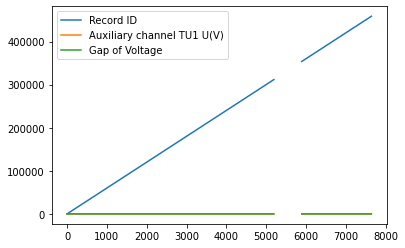

In [8]:
#plot a graph for the data
df.plot()

In [25]:
from scipy.signal import butter, filtfilt

#filter requirements
T = 10      #sample period
fs = 330    #sample rate, Hz
cutoff = 2  #desired cutoff frequency of filter, Hz, Slightly higher than actual
nyf = 0.5 * fs  #Nyquist Frequency
order = 3   #order of sampling

#Nyquist rate of frequency is the minimum rate at which a finite bandwidth 
#signal needs to be sampled to retain all of the information. 
#For a time series with regular intervals t, nyquist rate is 1/2*dt


In [15]:
#implement lowpass filter using scipy

def lowpass_filter(data, cutoff, fd, order):
    normal_cutoff = cutoff/nyf
    #get Filter coefficients
    b,a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [44]:
#plot the original signal data for Auxiliray channel TU1 U(V) and Gap of Voltage

figAC = go.Figure()
figGV = go.Figure()
conf = dict({'scrollZoom': True})   #to enable a scrollable zoom of plots
figAC.add_trace(go.Scatter(
            y = dfAC,
            line =  dict(shape =  'spline' ),
            name = 'Signal with noise'
            ))
figGV.add_trace(go.Scatter(
            y = dfGV,
            line =  dict(shape =  'spline' ),
            name = 'Signal with noise'
            ))

figAC.show(config=conf) 
 #this plot show the original data with noise of Auxiliray channel TU1 U(V)

#DOUBLE TAP ON GRAPH TO RESIZE TO DEFAULT SIZE AFTER ZOOMING

In [22]:
figGV.show(config=conf)
#this plot lies on the x-axis from sample 1 to 7642 because the Gap of Volage is Zero
#this need not be filtered as there is no noise in the samples

In [28]:
#Filter the data, and plot the comparison of original and filtered signals

#Apply filtering for Auxiliray channel TU1 U(V) samples
yAC = lowpass_filter(dfAC, cutoff, fs, order)  

filterFig = go.Figure()
filterFig.add_trace(go.Scatter(
            y = dfAC,
            line =  dict(shape =  'spline' ),
            name = 'signal with noise'
            ))
filterFig.add_trace(go.Scatter(
            y = yAC,
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
filterFig.show(config=conf)

In [30]:
#as seen in previous plot, the orange line to depict the filtering is not
#visible because the original data is not continous and so if the graph.

#after the missing of data, there is straight line which denotes no noise in that sampling
#thus that part doesn't require filtering.

#It is required to provide filtering till the noisy signal


In [40]:
#with the graph being zoomable, the signal contains noise from 0 to 5193 samples
#the data after this point is null or noiseless
#So I filter the noise till this record index and plot the graph.

yAC = lowpass_filter(dfAC[0:5193], cutoff, fs, order)   #Applying filter only for data with noise

filterFig = go.Figure()
filterFig.add_trace(go.Scatter(
            y = dfAC,
            line =  dict(shape =  'spline' ),
            name = 'signal with noise'
            ))
filterFig.add_trace(go.Scatter(
            y = yAC,
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
filterFig.show(config=conf)

#the orange line below shows the filtered signal.



In [47]:
#Filterd Data
yAC

array([-0.00129765, -0.00129726, -0.00129687, ..., -0.0012678 ,
       -0.0012678 , -0.0012678 ])

In [49]:

#Plot only filtered data of noise sample
figg = go.Figure()
figg.add_trace(go.Scatter(
            y = yAC,
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
figg.show(config = conf)